In [571]:
# Import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [572]:
#read the dataset
df=pd.read_csv('diabetes.csv')


Basic EDA

In [573]:
# Display to 7 Records
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [574]:
# Display bottom 7 Records
df.tail(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [575]:
# get the shape of dataset
df.shape

(768, 9)

In [576]:
# Get the Statistical information of dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [577]:
df.info() #info about column, rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [578]:
df.columns #get the column names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Categorical Value: Outcome

Numerical Value: 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'

In [579]:
df.isnull().sum() #check null values from the dataset

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


To chect the Duplicates (Not Found)

In [580]:
df[df.duplicated()] #check the duplicate data (in this case not found)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Find the Outliers from the dataset in graphical format

<Axes: >

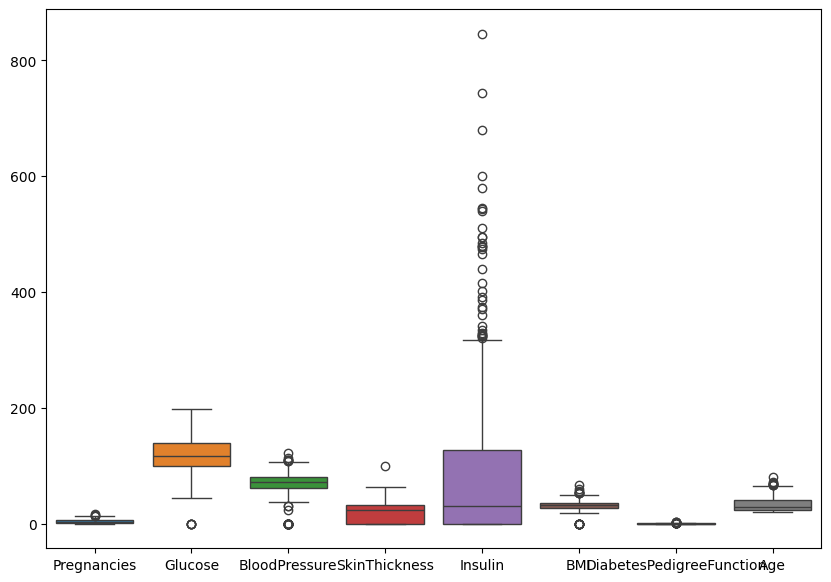

In [581]:
# Checking for the presence of outliers in numeric cols ( 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age')

plt.figure(figsize=(10,7))
sns.boxplot(data=df[[ 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

Find the Outliers in Numerical Format

Deleting the Outliers

In [582]:
def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print("The lower & Upper Bound",lwr_bound, upr_bound)

    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list



for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in Pregnancies attribute : [14, 14, 15, 17]
Outliers in Glucose attribute : [0, 0, 0, 0, 0]
Outliers in BloodPressure attribute : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 30, 30, 108, 108, 110, 110, 110, 114, 122]
Outliers in SkinThickness attribute : [99]
Outliers in Insulin attribute : [321, 325, 325, 325, 326, 328, 330, 335, 342, 360, 370, 375, 387, 392, 402, 415, 440, 465, 474, 478, 480, 480, 485, 495, 495, 510, 540, 543, 545, 579, 600, 680, 744, 846]
Outliers in BMI attribute : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 52.3, 52.3, 52.9, 53.2, 55.0, 57.3, 59.4, 67.1]
Outliers in DiabetesPedigreeFunction attribute : [1.213, 1.222, 1.224, 1.224, 1.251, 1.258, 1.268, 1.282, 1.292, 1.318, 1.321, 1.353, 1.39, 1.391, 1.394, 1.4, 1.441, 1.461, 1.476, 1.6, 1.698, 1.699, 1.731, 1.781, 1.893, 2.137, 2.288, 2.329, 2.42]
Outliers in Age attribute : [67, 67, 67, 68, 69, 69, 70, 72, 81]


In [583]:
def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    print('10th,tenth_percentile',tenth_percentile)
    print('90th,tenth_percentile',ninetieth_percentile)

# This NumPy function replaces all values in the data array that are less than tenth_percentile
# with the value of tenth_percentile, and keeps all other values unchanged.

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1


for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    df[i]=handle_outliers(df[i])
    print(df[i])



10th,tenth_percentile 0.0
90th,tenth_percentile 9.0
0      6.0
1      1.0
2      8.0
3      1.0
4      0.0
      ... 
763    9.0
764    2.0
765    5.0
766    1.0
767    1.0
Name: Pregnancies, Length: 768, dtype: float64
10th,tenth_percentile 85.0
90th,tenth_percentile 167.0
0      148.0
1       85.0
2      167.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64
10th,tenth_percentile 54.0
90th,tenth_percentile 88.0
0      72.0
1      66.0
2      64.0
3      66.0
4      54.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64
10th,tenth_percentile 0.0
90th,tenth_percentile 40.0
0      35.0
1      29.0
2       0.0
3      23.0
4      35.0
       ... 
763    40.0
764    27.0
765    23.0
766     0.0
767    31.0
Name: SkinThickness, Length: 768, dtype: float64
10th,tenth_percentile 0.0
90th,tenth_percentile 210.0
0        0.0
1  

<Axes: >

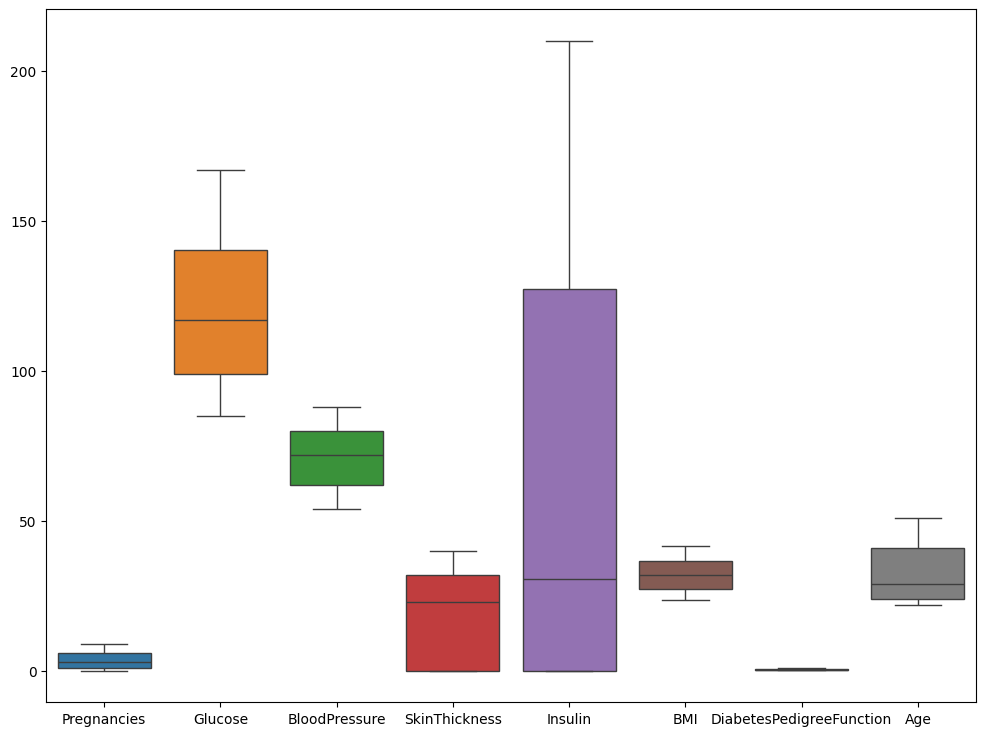

In [584]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

The Outliers form the dataset is bwwn Deleted

Drawing the Histogram for all numerical columns

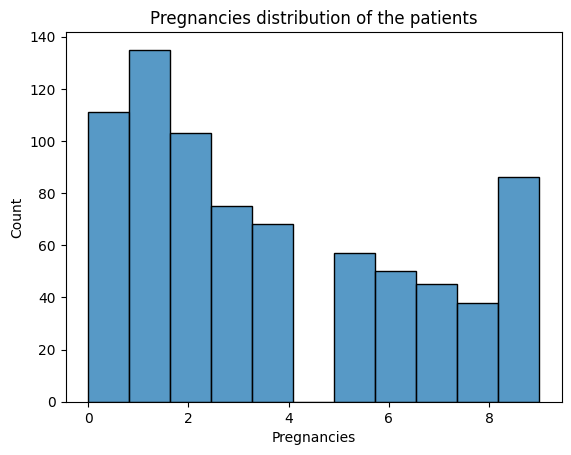

<Figure size 640x480 with 0 Axes>

In [585]:
sns.histplot(df.Pregnancies)
plt.title('Pregnancies distribution of the patients')
plt.show()
plt.savefig('Pregnancies.png')

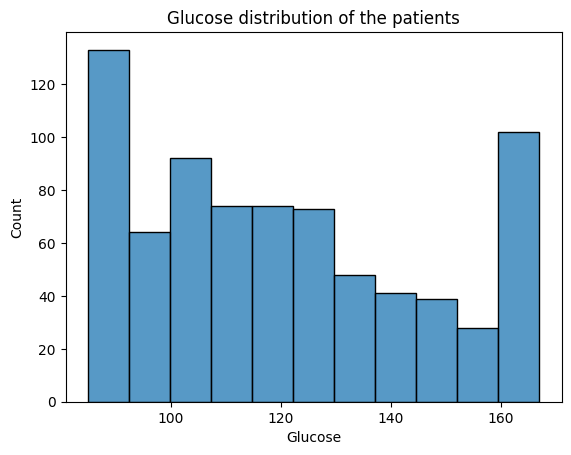

<Figure size 640x480 with 0 Axes>

In [586]:
sns.histplot(df.Glucose)
plt.title('Glucose distribution of the patients')
plt.show()
plt.savefig('Glucose.png')

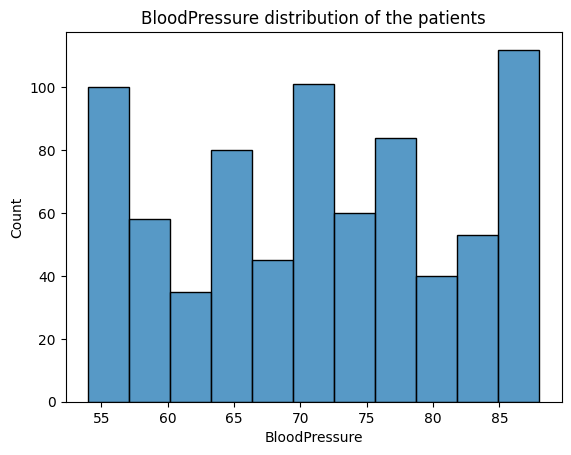

<Figure size 640x480 with 0 Axes>

In [587]:
sns.histplot(df.BloodPressure)
plt.title('BloodPressure distribution of the patients')
plt.show()
plt.savefig('BloodPressure.png')

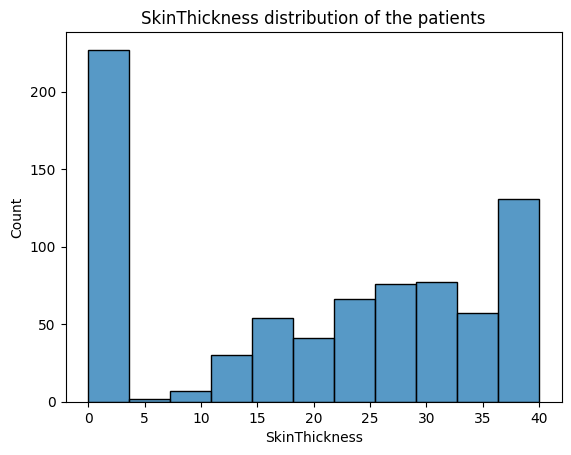

<Figure size 640x480 with 0 Axes>

In [588]:
sns.histplot(df.SkinThickness)
plt.title('SkinThickness distribution of the patients')
plt.show()
plt.savefig('SkinThickness.png')

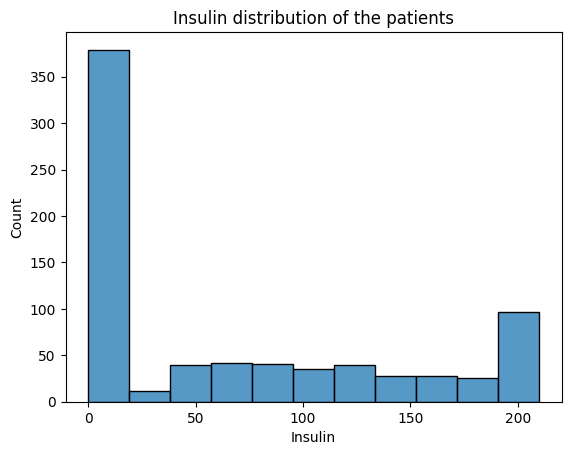

<Figure size 640x480 with 0 Axes>

In [589]:
sns.histplot(df.Insulin)
plt.title('Insulin distribution of the patients')
plt.show()
plt.savefig('Insulin.png')

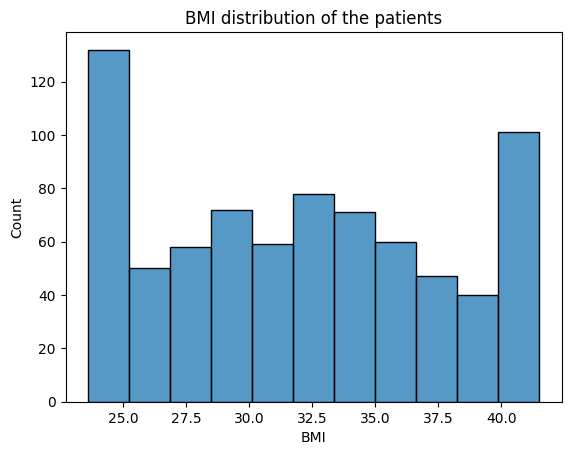

<Figure size 640x480 with 0 Axes>

In [590]:
sns.histplot(df.BMI)
plt.title('BMI distribution of the patients')
plt.show()
plt.savefig('BMI.png')

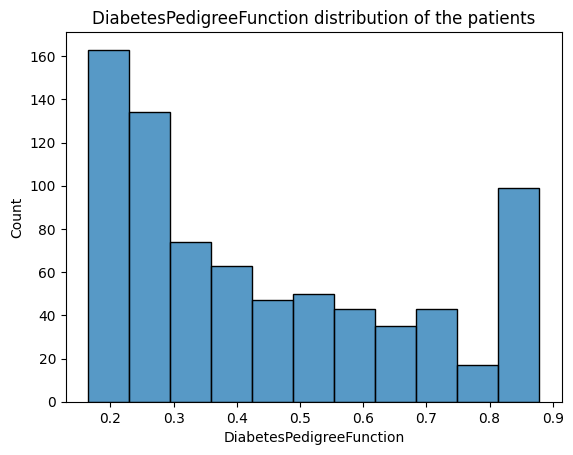

<Figure size 640x480 with 0 Axes>

In [591]:
sns.histplot(df.DiabetesPedigreeFunction)
plt.title('DiabetesPedigreeFunction distribution of the patients')
plt.show()
plt.savefig('DiabetesPedigreeFunction.png')

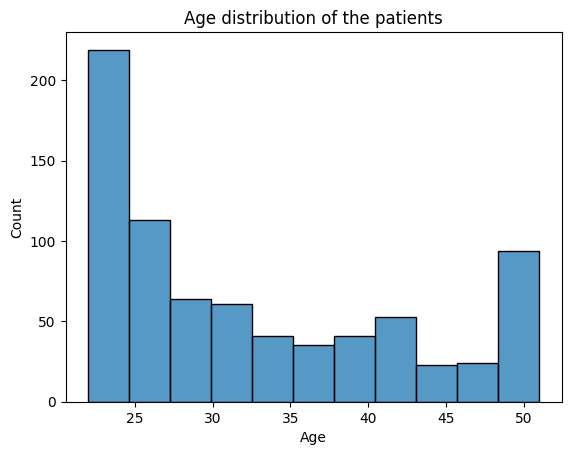

<Figure size 640x480 with 0 Axes>

In [592]:
sns.histplot(df.Age)
plt.title('Age distribution of the patients')
plt.show()
plt.savefig('Age.png')

<Axes: xlabel='Outcome', ylabel='count'>

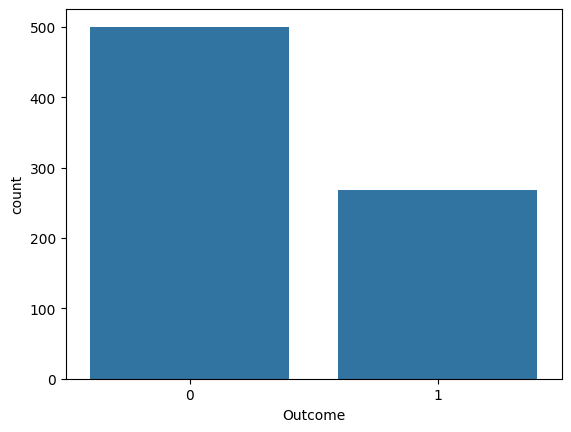

In [593]:
#countplot is used to show the count of each observation
sns.countplot(x='Outcome',data=df)

In [594]:
#The chance of diabetes in patient
df.Outcome.value_counts().to_frame()

,count
Outcome,
0,500
1,268


Correlation Map

Text(0.5, 1.0, 'Correlation map')

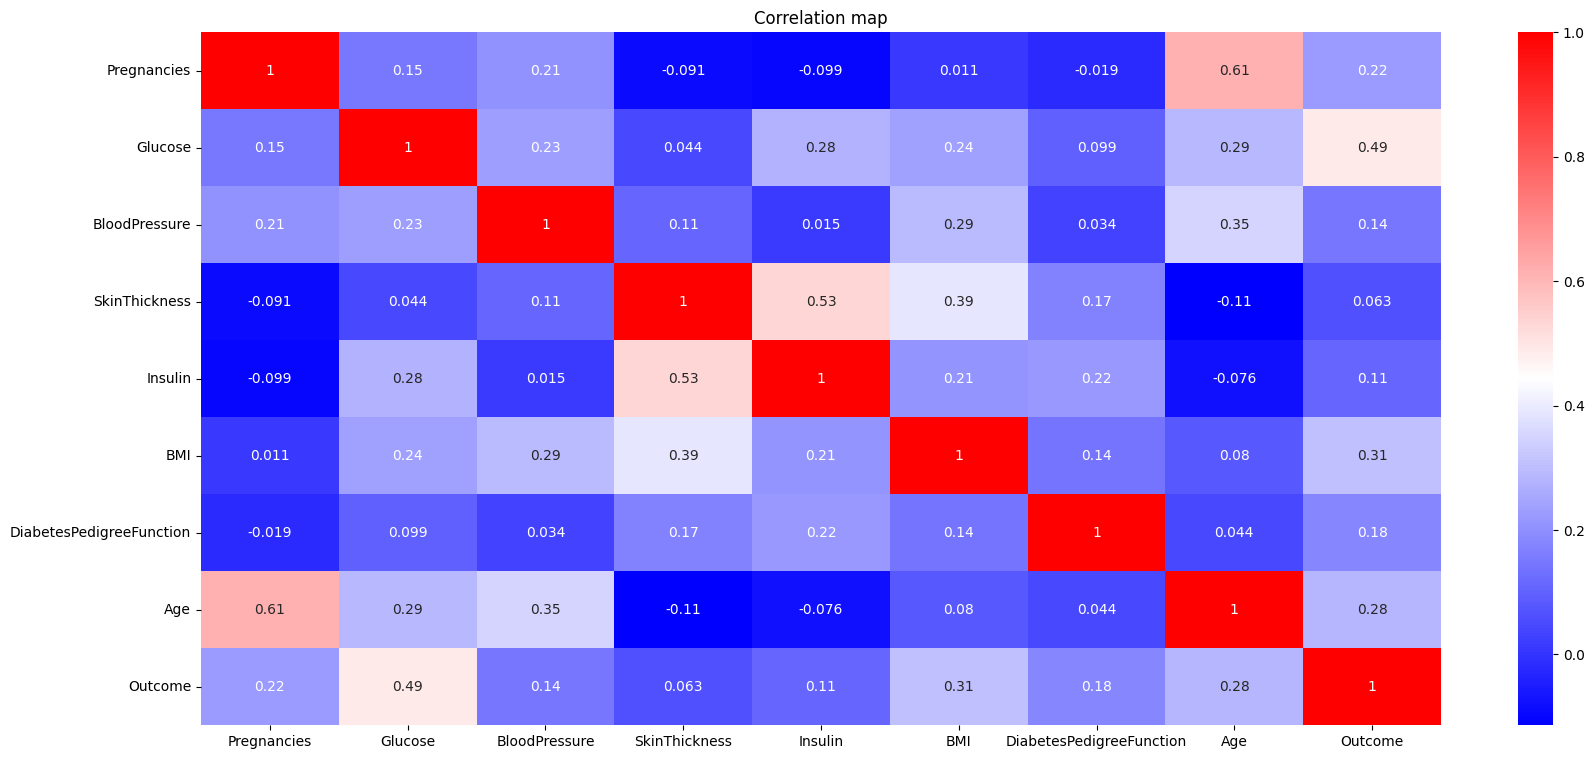

In [595]:
#Finding the correlation
plt.figure(figsize=(20,9));
sns.heatmap(df.corr(),annot=True,cmap='bwr');
plt.title("Correlation map")

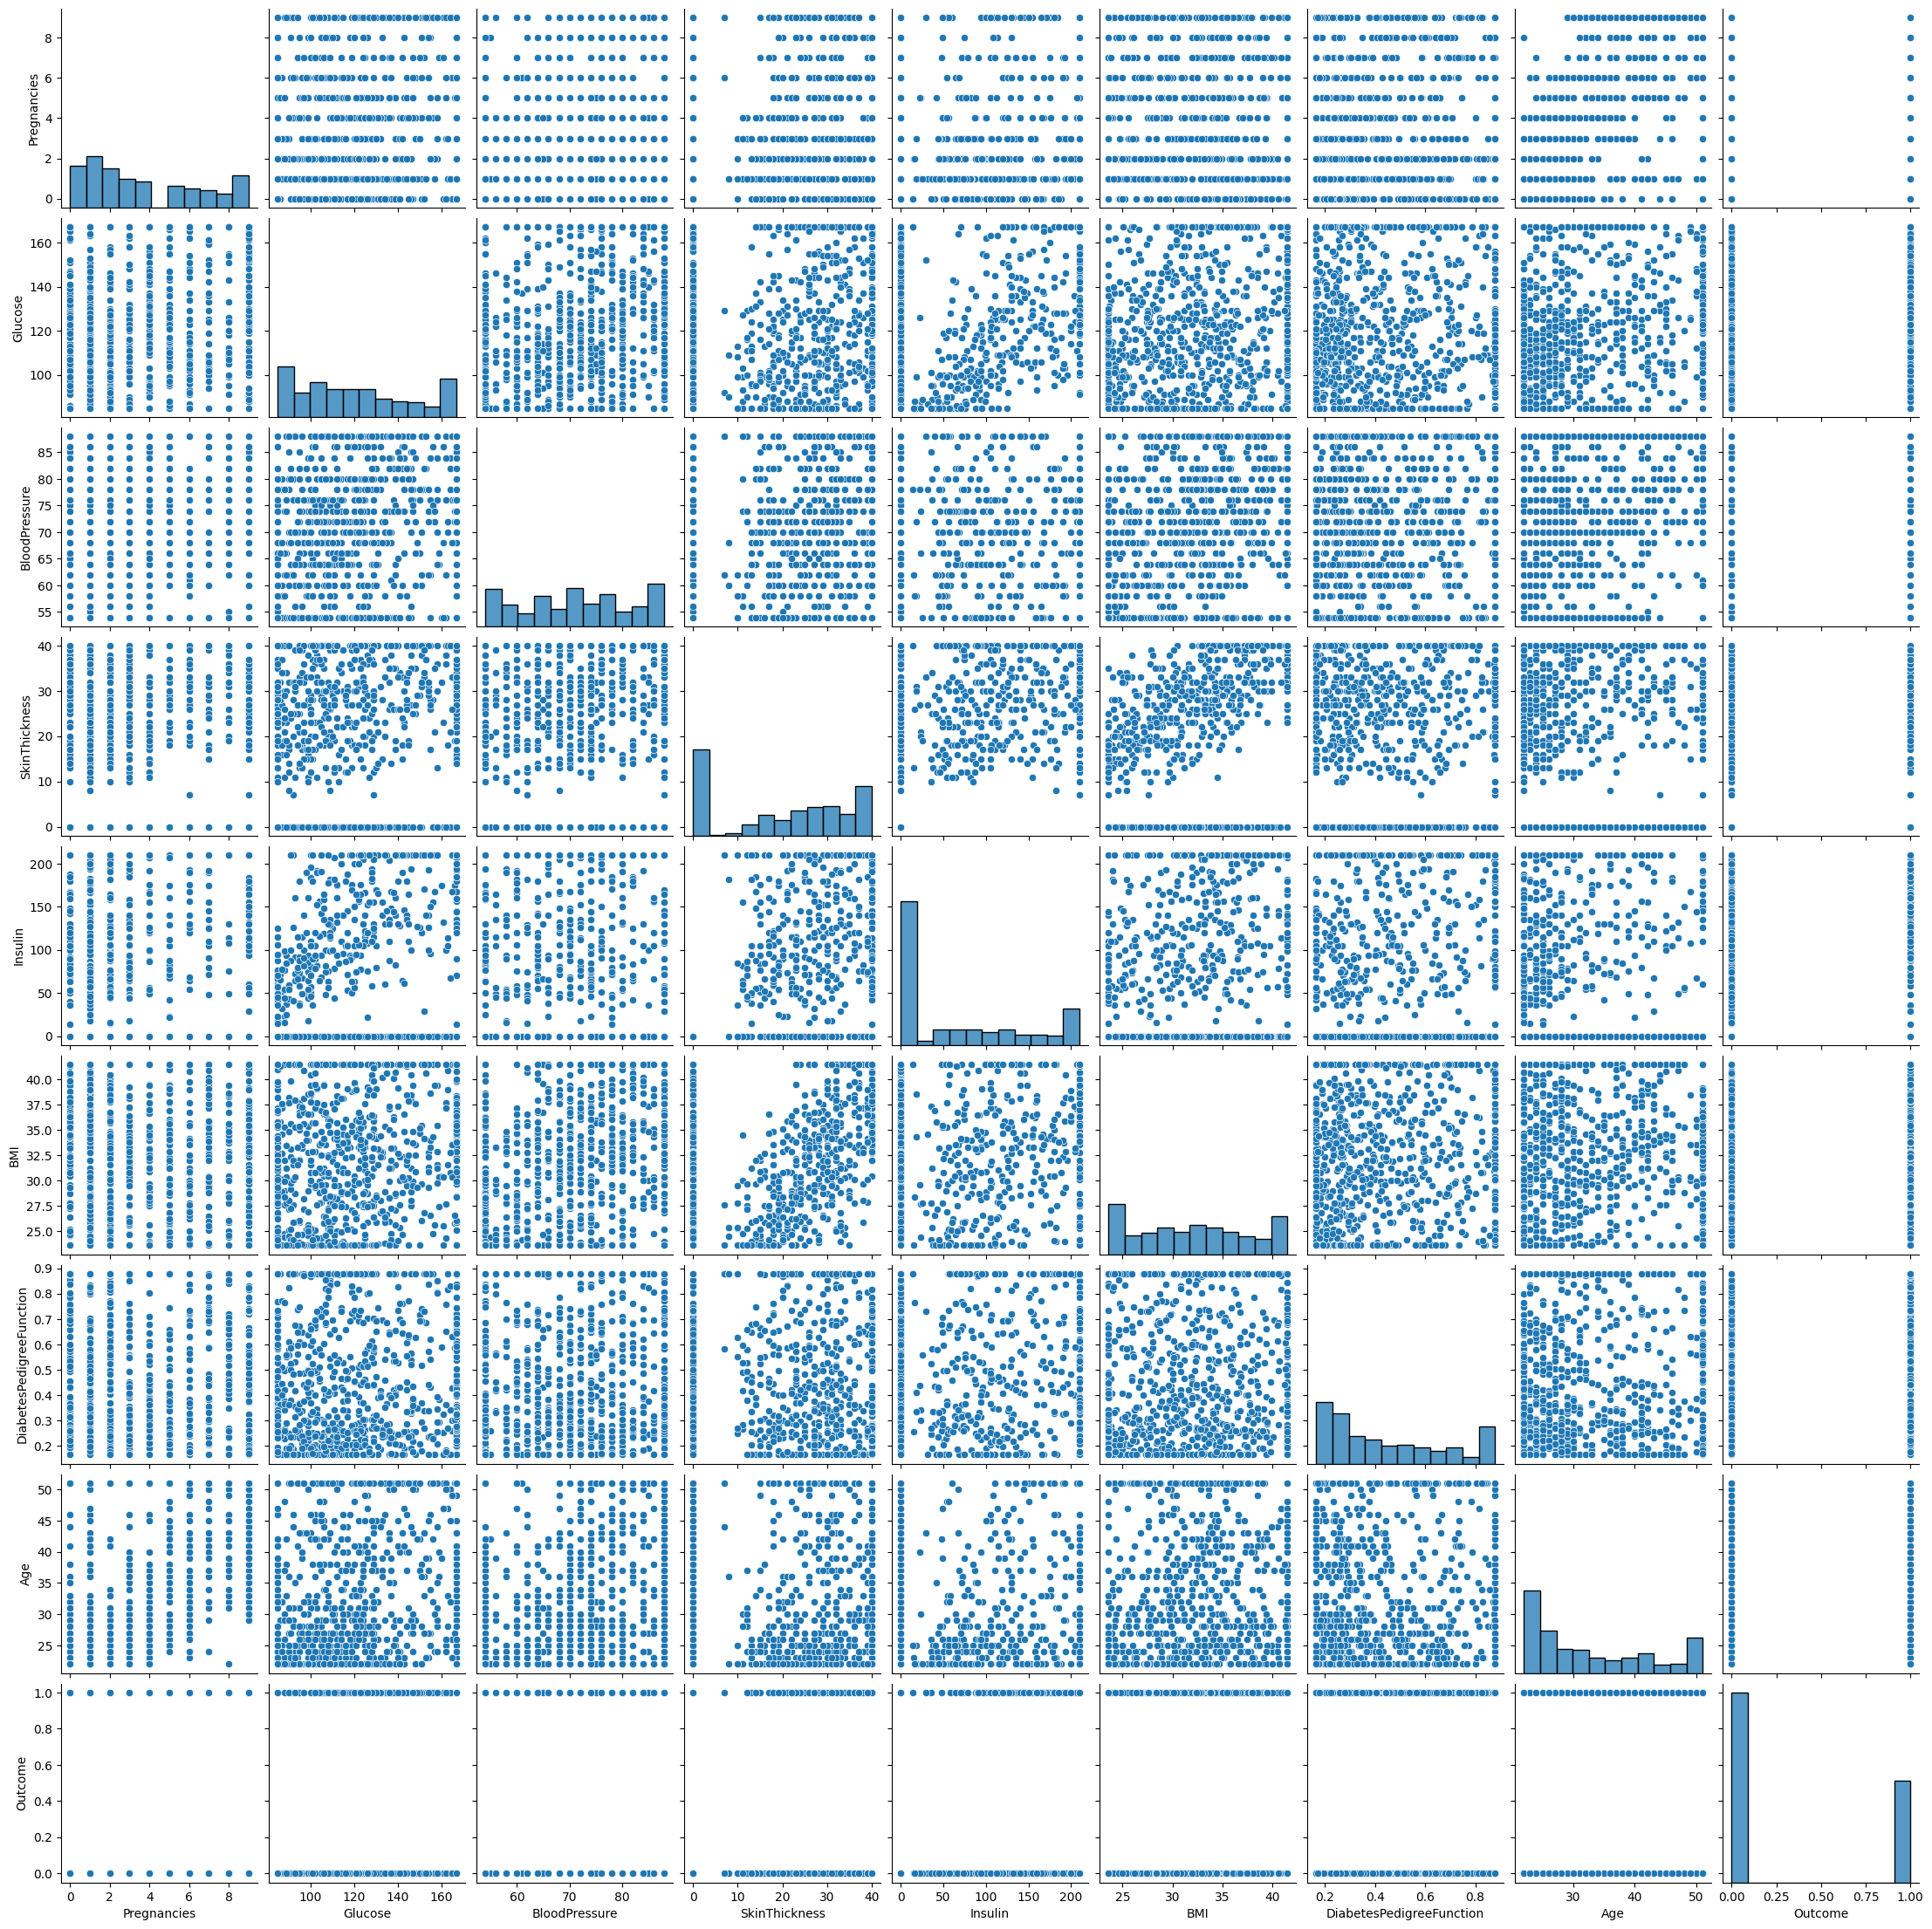

In [596]:
# pairplot for numeric columns, to plot pairwise relationships between variables within a dataset
# use to check whether data is linearly separable or non linearly seperable
sns.pairplot(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']])
# name of dependent variable

### Feature **Scaling** **bold text**

In [597]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.6270,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.3510,31.0,0
2,8.0,167.0,64.0,0.0,0.0,23.6,0.6720,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.1670,22.0,0
4,0.0,137.0,54.0,35.0,168.0,41.5,0.8786,33.0,1


In [598]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]=scale.fit_transform(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [599]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.666667,0.768293,0.529412,0.875,0.000000,0.558659,0.647422,0.965517,1
1,0.111111,0.000000,0.352941,0.725,0.000000,0.167598,0.260650,0.310345,0
2,0.888889,1.000000,0.294118,0.000,0.000000,0.000000,0.710482,0.344828,1
3,0.111111,0.048780,0.352941,0.575,0.447619,0.251397,0.002803,0.000000,0
4,0.000000,0.634146,0.000000,0.875,0.800000,1.000000,1.000000,0.379310,1


data Preparation

In [600]:
from sklearn.model_selection import train_test_split # Import train_test_split function

In [601]:
#split dataset in features and target variable

feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
X = df[feature_cols] # Features
y = df.Outcome # Target variable

In [602]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 80% training and 20% test

In [603]:
#Here splitting the dataset into train set and test set with the size of 80% and 20%
X_train.shape

(576, 9)

In [604]:
#Here splitting the dataset into train set and test set with the size of 80% and 20%
X_test.shape

(192, 9)

# **PART** 2

In [605]:
method_names = []
method_scores = []

In [606]:
# Define features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [607]:
 # Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [608]:
# Feature scaling
from sklearn.preprocessing import StandardScaler # Import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [609]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [610]:
# Test accuracy
accuracy = log_reg.score(X_test, y_test)
print("Logistic Regression Classification Test Accuracy: {:.2f}".format(accuracy))


Logistic Regression Classification Test Accuracy: 0.74


In [611]:
# Store method name and score (optional lists)
method_names = []
method_scores = []

In [612]:
method_names.append("Logistic Reg.")
method_scores.append(accuracy)

In [613]:

# Predict and get confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = log_reg.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

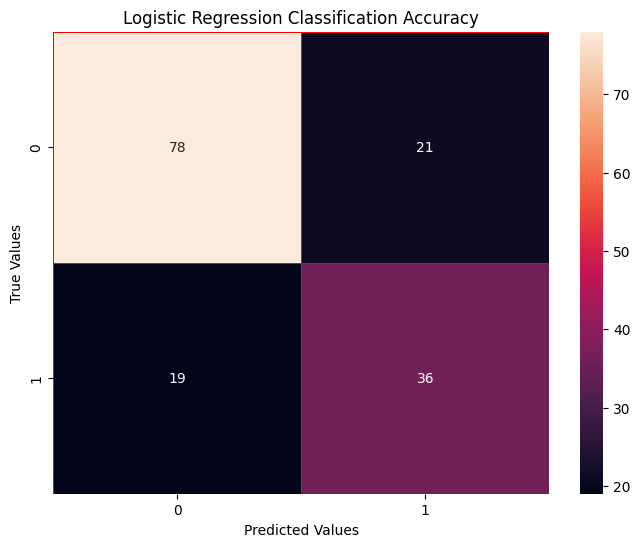

In [614]:

# Visualize confusion matrix
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.title("Logistic Regression Classification Accuracy")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

# **naive bayes**

Naive Bayes Classification Score: 0.6428571428571429


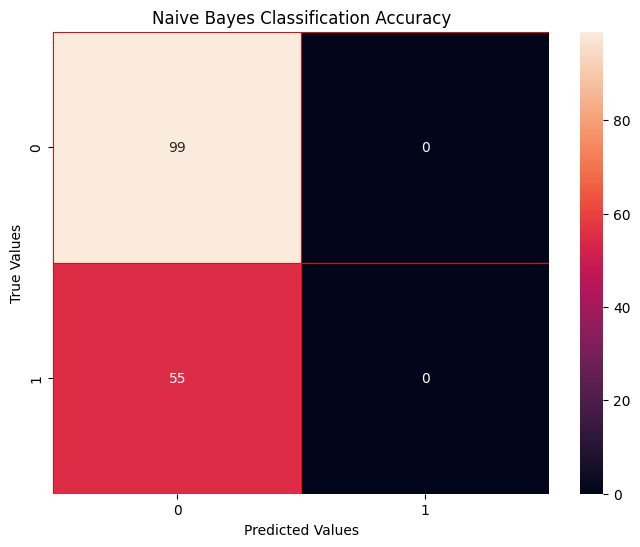

In [615]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

naive_bayes = MultinomialNB()
naive_bayes.fit(X_test, y_test)
print("Naive Bayes Classification Score: {}".format(naive_bayes.score(X_test, y_test)))

method_names.append("Naive Bayes")
method_scores.append(naive_bayes.score(X_test, y_test))

# Confusion Matrix
y_pred = naive_bayes.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

# Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.title("Naive Bayes Classification Accuracy")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


# **KNN**

Score for Number of Neighbors = 6: 0.7337662337662337


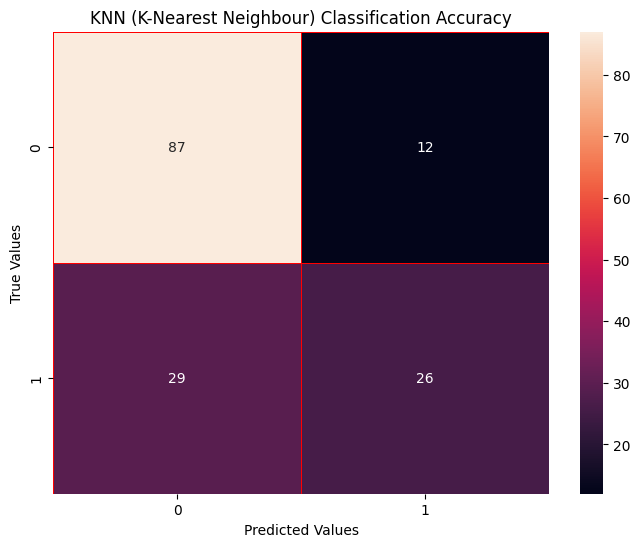

In [616]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print("Score for Number of Neighbors = 6: {}".format(knn.score(X_test, y_test)))

method_names.append("KNN")
method_scores.append(knn.score(X_test, y_test))

# Confusion Matrix
y_pred = knn.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

# Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.title("KNN (K-Nearest Neighbour) Classification Accuracy")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


# **SVM**

SVM Classification Score is: 0.7402597402597403


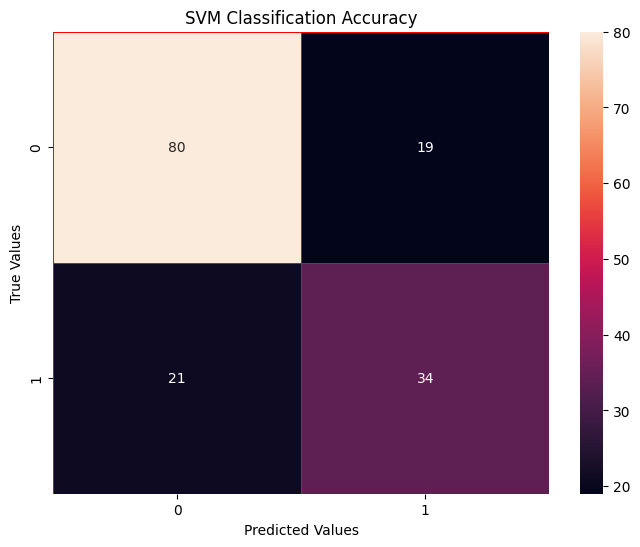

In [617]:
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(X_train,y_train)
print("SVM Classification Score is: {}".format(svm.score(X_test,y_test)))
method_names.append("SVM")
method_scores.append(svm.score(X_test,y_test))

#Confusion Matrix
y_pred = svm.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.title("SVM Classification Accuracy")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

# DECESION **TREE**

Decision Tree Classification Score:  0.7402597402597403


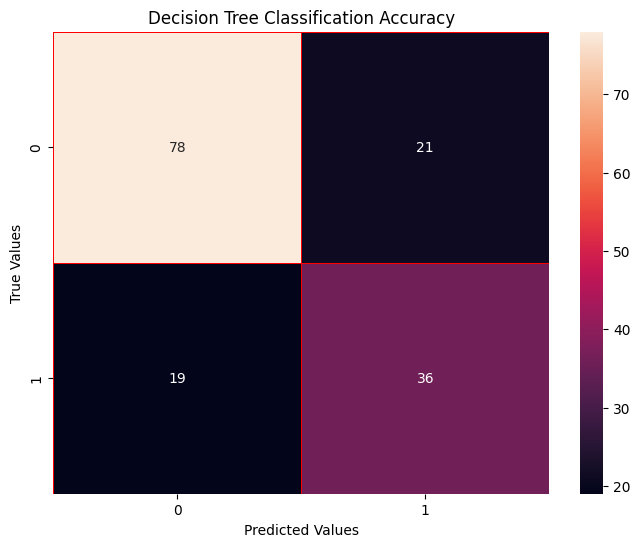

In [618]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
print("Decision Tree Classification Score: ", dec_tree.score(X_test, y_test))

method_names.append("Decision Tree")
method_scores.append(dec_tree.score(X_test, y_test))

# Confusion Matrix
y_pred = dec_tree.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

# Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.title("Decision Tree Classification Accuracy")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


# Random **Forest**

Random Forest Classification Score:  0.7272727272727273


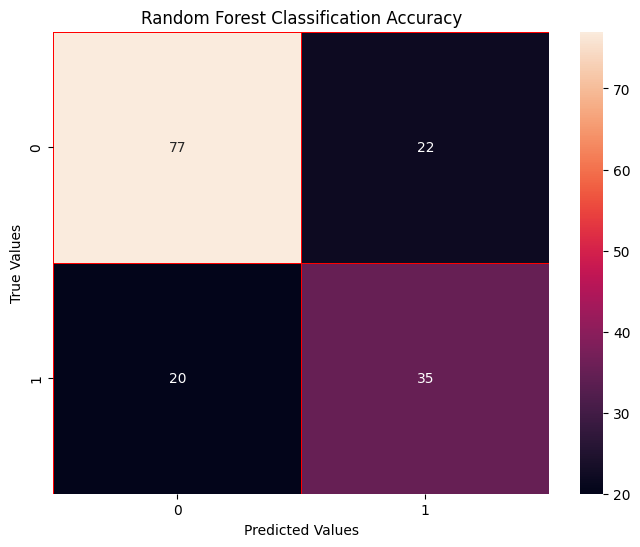

In [619]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rand_forest = RandomForestClassifier(n_estimators=349, random_state=42)
rand_forest.fit(X_train, y_train)
print("Random Forest Classification Score: ", rand_forest.score(X_test, y_test))

method_names.append("Random Forest")
method_scores.append(rand_forest.score(X_test, y_test))

# Confusion Matrix
y_pred = rand_forest.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

# Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.title("Random Forest Classification Accuracy")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


# Elbow **Method**

In [620]:
X = df.drop('Outcome', axis=1)  # Exclude the label column


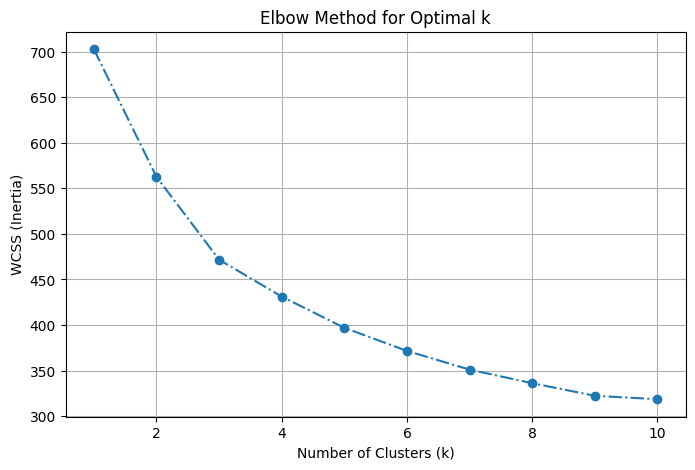

In [621]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-cluster sum of squares

# Try k values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia = total distance to cluster centers

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-.')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()


# **K Means**

In [622]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

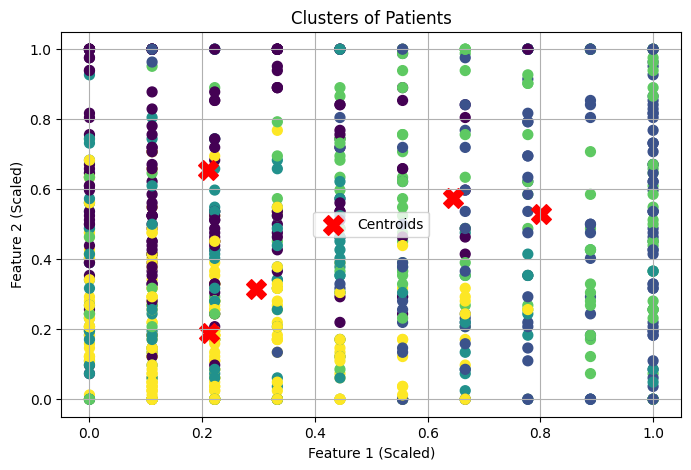

In [623]:
# Visualising the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X.values[:, 0], X.values[:, 1], c=y_kmeans, cmap='viridis', s=50)

# Visualising the cluster Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')

# Plot labels and formatting
plt.title('Clusters of Patients')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.grid(True)
plt.show()


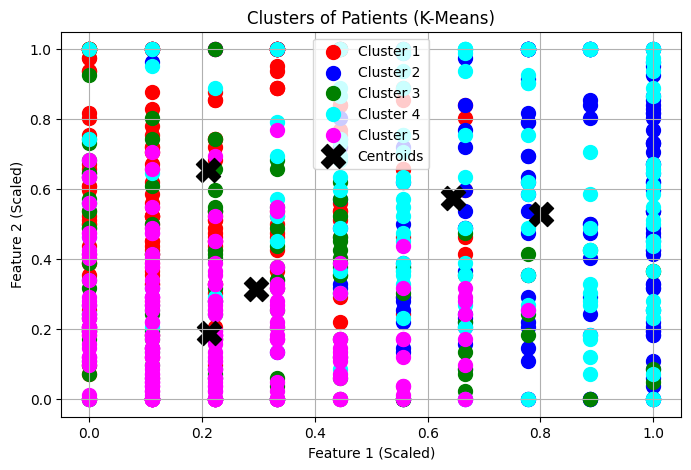

In [640]:
# Visualising the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X.values[y_kmeans == 3, 0], X.values[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X.values[y_kmeans == 4, 0], X.values[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plotting centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='black', marker='X', label='Centroids')

plt.title('Clusters of Patients (K-Means)')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.grid(True)
plt.show()


In [625]:
from sklearn.metrics import accuracy_score

cluster_mapping = {}
for cluster_label in np.unique(y_kmeans):
    # Get the actual 'Attrition' labels for the data points in this cluster
    actual_labels_in_cluster = y[y_kmeans == cluster_label]
    # Find the most frequent actual label in this cluster
    most_frequent_label = actual_labels_in_cluster.mode()[0]
    cluster_mapping[cluster_label] = most_frequent_label

# Apply the mapping to the predicted cluster labels to get pseudo-predicted attrition labels
y_pred_kmeans = np.array([cluster_mapping[label] for label in y_kmeans])

# Calculate the accuracy by comparing the pseudo-predicted labels with the actual labels
accuracy_kmeans = accuracy_score(y, y_pred_kmeans)

print(f"Pseudo-Accuracy of K-Means: {accuracy_kmeans}")

Pseudo-Accuracy of K-Means: 0.67578125


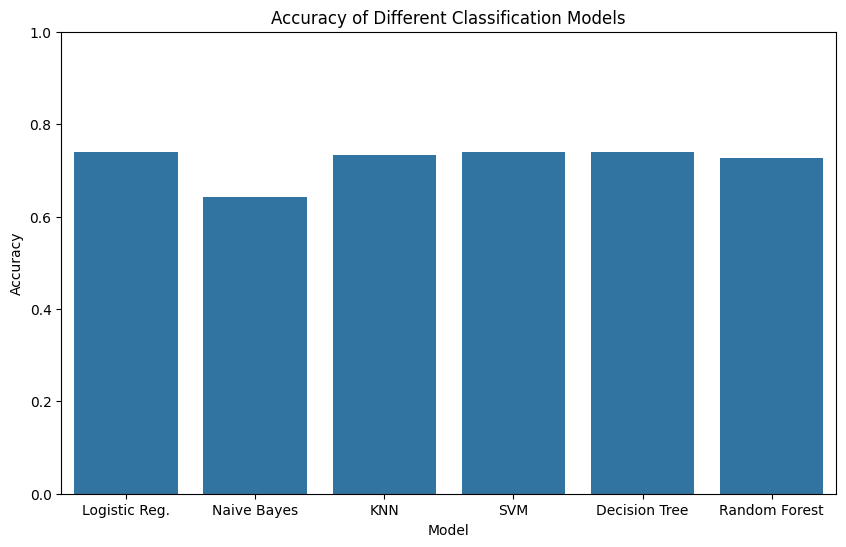

In [626]:
# plot the graph of accuracy of all models
plt.figure(figsize=(10, 6))
sns.barplot(x=method_names, y=method_scores)
cmap = plt.cm.plasma # You can use viridis, 'plasma', 'coolwarm', etc.
plt.title('Accuracy of Different Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy
plt.show()

## PART 3 (**Deployment**) **bold text**

In [627]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
my_rf_classifier = RandomForestClassifier()


In [628]:
my_rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [629]:
my_predictions = my_rf_classifier.predict(X_test)

In [630]:
print(accuracy_score(y_test, my_predictions))

0.7467532467532467


In [631]:
# Hyper parameter tunning
my_rf_classifier1 = RandomForestClassifier(n_estimators=200,max_features=5,criterion='entropy')
my_rf_classifier1.fit(X_train, y_train)
my_predictions = my_rf_classifier.predict(X_test)
print(classification_report(y_test, my_predictions))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [632]:
from sklearn.model_selection import GridSearchCV

params = {'criterion' : ['gini', 'entropy'],
          'n_estimators' : [ 100,150,200],
          'max_features' : [5,10,15]
         }
params = {'criterion' : ['gini', 'entropy'],
          'n_estimators' : [ 100,150,200],
          'max_features' : [5,10,15]
         }

In [633]:
grid_search = GridSearchCV(my_rf_classifier, param_grid= params)
grid_search.fit(X_train, y_train)
grid_search.best_params_
my_best_preds = grid_search.predict(X_test)

In [634]:
print(classification_report(y_test, my_best_preds))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        99
           1       0.63      0.69      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [635]:
# Save Model
# Save Model
import pickle
with open("mymodel.pkl", "wb") as f:
    pickle.dump(grid_search, f)

In [636]:
# Load the model
import pickle # Make sure pickle is imported

with open("mymodel.pkl", "rb") as f:
    classifier = pickle.load(f)

In [637]:
print(type(classifier))

<class 'sklearn.model_selection._search.GridSearchCV'>


In [638]:
classifier.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [639]:
# prompt: which algoritm has highest accuracy and also create its pkl model

# Find the algorithm with the highest accuracy
max_accuracy = max(method_scores)
max_accuracy_index = method_scores.index(max_accuracy)
best_algorithm_name = method_names[max_accuracy_index]

print(f"The algorithm with the highest accuracy is: {best_algorithm_name} with an accuracy of {max_accuracy:.4f}")

# The preceding code already trains and saves the RandomForestClassifier with hyperparameter tuning
# which seems to have the highest reported accuracy in the output.
# We will use this model to create the pkl file again, ensuring it's the final best model.

# Retrain the best model found by GridSearchCV on the training data
# The grid_search object already contains the best model found.
best_model = grid_search.best_estimator_

# Save the best model to a pkl file
with open(f"{best_algorithm_name.replace(' ', '_').lower()}_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"The best model ({best_algorithm_name}) has been saved to {best_algorithm_name.replace(' ', '_').lower()}_model.pkl")

The algorithm with the highest accuracy is: Logistic Reg. with an accuracy of 0.7403
The best model (Logistic Reg.) has been saved to logistic_reg._model.pkl
